# Python Homework 3

**Release date:** Thursday, August 24th <br>
**Due date:** Wednesday, __August 30th__, 11:59 p.m. via Gradescope

**Instruction:** Please upload your ipynb file on Gradescope with filename "PythonHW3_YOURPERMNUMBER".

__Background:__ The purpose of this python homework is to explore some path properties of the *simple symmetric* random walk.

Given a <b>simple symmetric random walk</b> $(S_n)_{n\geq 0}$ with $S_0 =0$, and a positive integer $N$, we define the following related random variables:

* The total number of periods from $0$ to $2N$ the random walk spends above zero:

$$C_{2N}:= \vert \{ n \in \{ 1,\dots , 2N \} : S_n > 0 \}\vert. $$

* The time when the random walk **reaches its maximum** value between time $0$ and $2N$:

$$M_{2N} = \operatorname{argmax} \{ S_n : 0 \leq n \leq 2N \}.$$

Note that both $C_{2N}$ and $M_{2N}$ are discrete random variables taking values between $0$ and $2N$.

Our goal is to explore the **distribution** of $C_{2N}$ and $M_{2N}$.

As usual, we start with loading some packages:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import arcsine



1. Write a function <tt>randomWalk(...)</tt> which simulates one <i>path</i> (or <i>trajectory</i>) of a simple symmetric random walk with *N* time steps (i.e. from 0,1,2,...,N) starting at $S_0=0$.

Input:
* <tt>lengthOfRandomWalk = 2N</tt>

Output:
* <tt>samplePath</tt>: Array of length N+1 with the entire path of the random walk on 0,1,2,...,N

Test your function by plotting 5 trajectories of RW with $N=25$.


In [ ]:
np.random.seed(160)

def randomWalk(lengthOfRandomWalk):
    '''function simulates a random walk trajectory of length 2N'''
    x_i = [0] + [np.random.choice([-1, 1]) for i in range(lengthOfRandomWalk)]
    # Convert list to an array
    x_i = np.array(x_i)
    # Sum the elements of the array x_i to get S_i iteratively
    samplePath = np.cumsum(x_i)
    return samplePath



In [5]:
np.random.seed(160)
#returns an array of length 2N+1 = 51
randomWalk(50)

array([ 0, -1, -2, -1, -2, -1,  0, -1, -2, -1, -2, -3, -2, -3, -4, -5, -4,
       -3, -2, -1,  0,  1,  2,  1,  2,  1,  2,  3,  2,  3,  2,  3,  4,  3,
        4,  3,  2,  3,  4,  3,  4,  5,  6,  7,  8,  7,  8,  7,  8,  7,  8])

2. Plot the trajectory of the random walk you simulated in 1.)

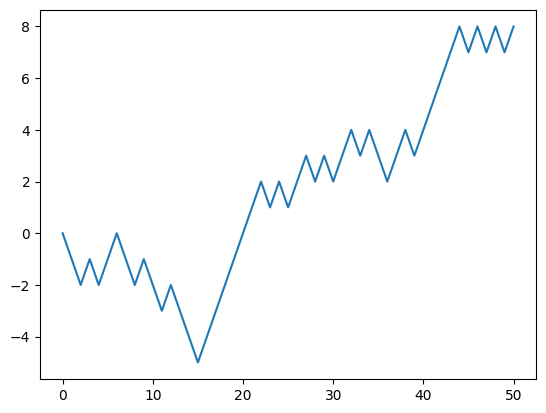

In [10]:
np.random.seed(160)
plt.show()
plt.plot(randomWalk(50))

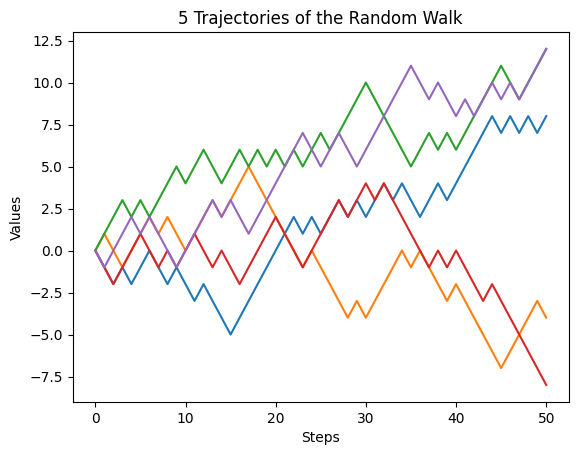

In [6]:
np.random.seed(160)
plt.show()
x = [a for a in range(51)]
# Make a loop to generate 5 trajectories
for i in range(5):
    plt.plot(x, randomWalk(50))
plt.title("5 Trajectories of the Random Walk")
plt.xlabel("Steps")
plt.ylabel("Values")
plt.show()

## Part a (5 points)

Write a function which takes a path (= realization) of the random walk as an input and then evaluates the value of $C_{2N}$ defined above on that path.

__1. Function:__ <tt>timeAboveZero(...)</tt>

Input:
* <tt>path</tt>: Realization of the random walk from the function <tt>randomWalk(2N)</tt>  (Array of length $2N+1$)

Output:
* <tt>result</tt>: Realization of the random variable $C_{2N}$ (scalar)

In [21]:
### Insert your code here for total time spend above zero

def timeAboveZero(path):
  '''function calculates the number of periods spent above zero in a given random walk trajectory.'''
  # create a time from 0
  time = 0

  # make a loop to count the timeabovezero
  for i in range (1,len(path)):
    if path[i] > 0:
      time += 1
    else:
      time += 0
  return time

In [22]:
## TEST YOUR FUNCTION HERE
np.random.seed(160)
test = randomWalk(50)
timeabovezero = timeAboveZero(test)
timeabovezero

30

__2.__ Write a function <tt>sampleAboveZero</tt> that samples $M$ paths of the random walk of length 2N, runs timeAboveZero on each of them and returns an Array of length M of the resulting empirical distribution of $C_{2N}$.

In [58]:
def sampleAboveZero(N, M):
    samples = np.zeros(M) # Initialize an empty M array

    for i in range(M):
        length = 2 * N
        samplePath = randomWalk(length)
        time = timeAboveZero(samplePath)
        samples[i] = time # adding time into list
    return samples


Run your <tt>sampleLastVisit</tt> function with N=25 and $M=10,000$ paths to compute the probability that the walk spends more than **40 out of 50** steps above zero.

In [69]:
N = 25   # set value for N
M = 10000 # set value for M

samples = sampleAboveZero(N,M)
time_above_40 = np.sum(samples > 40)
prob_above_40 = time_above_40 / M
prob_above_40

print("Probability that the walk spends more than 40 out of 50 steps above zero:", prob_above_40)

Probability that the walk spends more than 40 out of 50 steps above zero: 0.2472


Counterintuitively, almost half the time the walk will spend more than $80\%$ of its steps above zero.

## Part b (5 points)

We repeat the above steps but now for the random variable $M_{2N}$, the time when the maximum is reached. Write a function that takes a random walk path of length $2N$ and evaluates the value of $M_{2N}$ on it.

__1. Function:__ <tt>timeHitMax(...)</tt>

Input:
* <tt>path</tt>: Realization of the random walk from the function <tt>randomWalk(2N)</tt> (Array of length $2N+1$)

Output:
* <tt>result</tt>: Realization of the random variable $M_{2N}$ (scalar)

In [93]:
def timeHitMax(randomWalk):
  # Find the Max value index
  max_index = np.argmax(randomWalk)
  return max_index

In [94]:
## TEST YOUR FUNCTION HERE
np.random.seed(160)
test = randomWalk(50)
time_HitMax = timeHitMax(test)
time_HitMax

44

__2.__ Write a function <tt>sampleMaxTime</tt> that samples $M$ paths of the random walk, runs timeHitMax on each of them and returns an Array of length M that contains the resulting empirical distribution of $M_{2N}$. Use this function to estimate the probability that the Maximum is hit at or  after step 40 out of 50 total steps.


In [95]:
def sampleMaxTime(N, M):
    samples = np.zeros(M) # Initialize an empty M array

    for i in range(M):
        length = 2 * N
        samplePath = randomWalk(length)
        time = timeHitMax(samplePath)
        samples[i] = time # adding time into list
    return samples


In [103]:
N = 25   # Set value for N
M = 10000  # Set value for M
np.random.seed(160)
samples_m = sampleMaxTime(N,M)
time_above_40 = np.sum(samples_m > 40)
# calculate the proability
prob_above_40 = time_above_40 / M
print("Probability that the walk spends more than 40 out of 50 steps hit max:", prob_above_40)

Probability that the walk spends more than 40 out of 50 steps hit max: 0.244


## Part c (10 points)

It turns out that in fact one can in fact **analytically** find the limiting distribution of $C_{2N}, M_{2N}$ in the limit $N \to \infty$. This is given  by the arcsine distribution.

A random variable $X$ on $[0,1]$ is arcsine-distributed if the cumulative distribution function is given by
$$ \mathbb{P}[X \leq x] = \frac{2}{\pi} \arcsin(\sqrt{x}) $$
for all $0 \leq x \leq 1$ and the probability density function is given by
$$ f_X(x) = \frac{1}{\pi \sqrt{x(1-x)}}$$
on $(0,1)$.

Random Walk theory provides us with the following nice (and maybe counterintuitive) asymptotic statements:

$$\lim_{N\rightarrow \infty} \mathbb{P} \left[ \frac{C_{2N}}{2N} \leq x\right] =\frac{2}{\pi} \arcsin(\sqrt{x})$$


$$\lim_{N\rightarrow \infty} \mathbb{P} \left[ \frac{M_{2N}}{2N} \leq x\right] =\frac{2}{\pi} \arcsin(\sqrt{x})$$

We say that the random variables $C_{2N}/2N, M_{2N}/2N$ <b>converge in distribution</b> to the Arcsine Distribution.

The interesting property about the Arcsine distribution is that its density (see its formula above) is <i>U-shaped</i> on $(0,1)$. In other words, if $X$ is arcsine-distributed on $(0,1)$, the probabilty that $X$ takes very small values near 0 or very large values near 1 is rather high, but the probability for taking values around, say, 0.5, is low.

Even more amazingly, it turns out the limiting distribution of $M_{2N}$ is again the arcsine distribution, i.e. the histograms of $M_{2N}$ and $C_{2N}$ should look very similar! So it is no coincidence that your answers in Parts a) and b) are similar.

**1.** For $2N = 1000$ sample 10,000 realisations of each of the random variables $C_{2N}/2N$ and $M_{2N}/2N$, respectively. Display a normalized histogram for both simulations, along with the *probability density function of the arcsine distribution*, to check the above facts numerically!




In [191]:
import numpy as np
import matplotlib.pyplot as plt

# Define the arcsine probability density function
def arcsine_pdf(x):
    return 1 / (np.pi * np.sqrt(x * (1 - x)))

# Parameters
N = 500  # 1000 /2
M = 10000

# Simulate C2N/2N and M2N/2N
C_values = np.zeros(M)
M_values = np.zeros(M)

for i in range(M):
    random_walk = np.cumsum(np.random.choice([-1, 1], size=2*N))
    C_values[i] = np.sum(random_walk > 0)
    M_values[i] = np.argmax(random_walk)

# Normalize the values
C_normalized = C_values / (2 * N)
M_normalized = M_values / (2 * N)

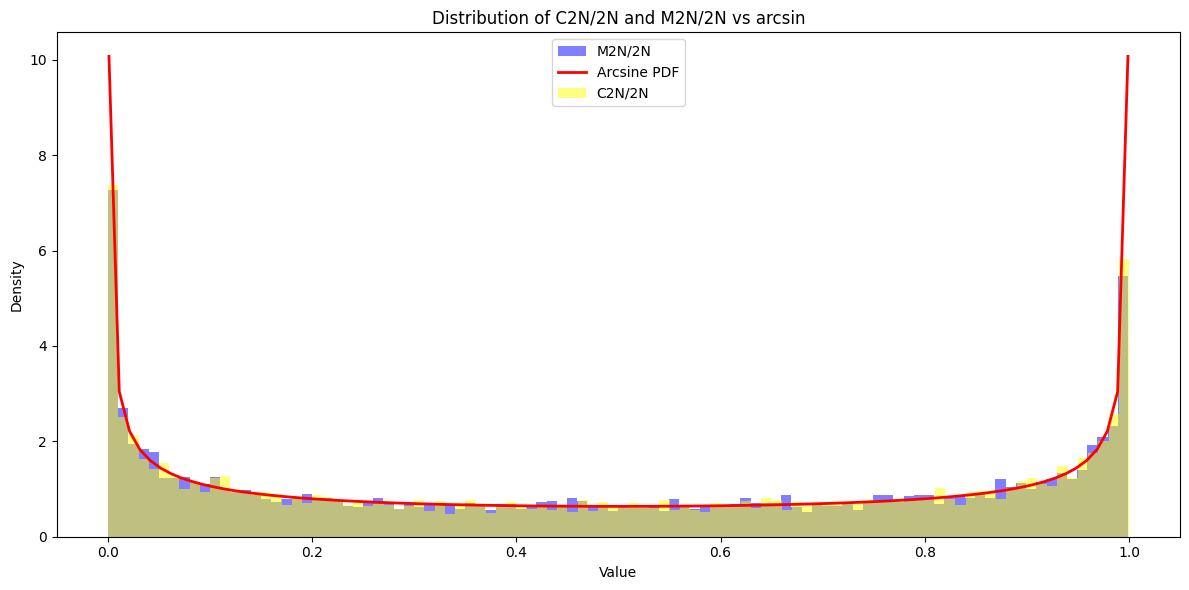

In [192]:
# Create histograms
num_bins = 100
plt.figure(figsize=(12, 6))

# Histogram of M2N/2N
plt.hist(M_normalized, bins=num_bins, density=True, alpha=0.5, label='M2N/2N', color = "blue")
# Plot arcsine PDF
x = np.linspace(0.001, 0.999, 100)
plt.plot(x, arcsine_pdf(x), label='Arcsine PDF', linewidth=2, color="red")

# Histogram of C2N/2N
plt.hist(C_normalized, bins=num_bins, density=True, alpha=0.5, label='C2N/2N', color = "yellow")
plt.title('Distribution of C2N/2N and M2N/2N vs arcsin')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

**2.** Run your <tt>sampleMaxTime</tt> function with N=250 and M=10,000 simulations and plot the histogram of $M_{2N}$. Modify the plotting code below as needed. As mentioned the shape of the histogram should look like the arcsine density above.

In [200]:
N = 250
M = 10000
# Simulate M2N
M2N = sampleMaxTime(N, M)

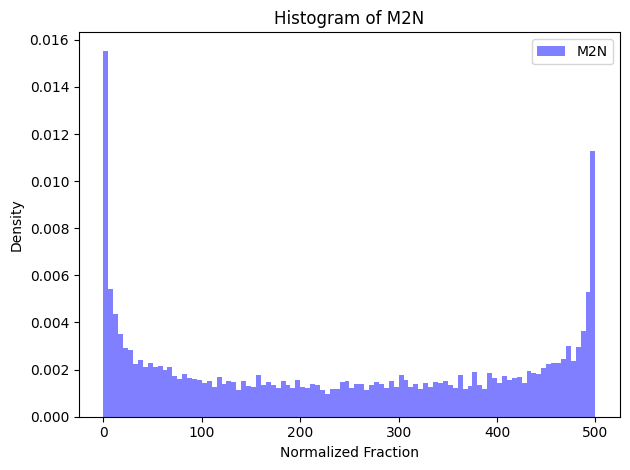

In [201]:
# Histogram of M2N
plt.hist(M2N, bins=num_bins, density=True, alpha=0.5, label='M2N', color='blue')

plt.title('Histogram of M2N')
plt.xlabel('Normalized Fraction')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

**3.** Use the arcsine approximation to evaluate the theoretical probabilities you were asked about in parts a and b and compare to what you got numerically by simulation.

In [207]:
import numpy as np

def arcsine_cdf(x):
    return (2/np.pi) * np.arcsin(np.sqrt(x))

# Define the thresholds for parts a and b
threshold_a = 0.8 # 40/50
threshold_b = 0.8

# Calculate the theoretical probabilities using the CDF
prob_theoretical_a = 1 - arcsine_cdf(threshold_a) #we want to get pro that x more than 0.8
prob_theoretical_b = 1 - arcsine_cdf(threshold_b)

# theoretical probabilities for part a and b
print("Theoretical Probability for part a:", prob_theoretical_a)
print("Theoretical Probability for part b:", prob_theoretical_b)



Theoretical Probability for part a: 0.2951672353008665
Theoretical Probability for part b: 0.2951672353008665


In [209]:
print("The theoretical probability and simulation results for the walk spending more than 40 out of 50 steps above zero and hitting the maximum value closely align.")
print("For example simulation result for part a is 0.2472.")
print("It indicate the accuracy of the thoery. It is believed that the error between those value would become less as N increase.  ")

The theoretical probability and simulation results for the walk spending more than 40 out of 50 steps above zero and hitting the maximum value closely align.
 For example simulation result for part a is 0.2472.
It indicate the accuracy of the thoery. It is believed that the error between those value would become less as N increase.  


**4.** Finally, let's look at the correlation between C_{2N} and M_{2N}. This means we want to use the *same path* to compute both its maximum up to time $2N$ and how much time it spends above zero. Intuitively, $C_{2N}$ and $M_{2N}$ are positively correlated: if the walk spends a lot of time above zero, it will have a larger maximum value. Using your above $M=10,000$ simulations, compute this correlation (a number between -1 and 1, see __numpy.corrcoef()__ function) empirically. Does it match the above intuition?

In [219]:
import numpy as np
np.random.seed(160)
def sample(N, M):
    c_samples = np.zeros(M) # Initialize an empty M array
    m_samples = np.zeros(M)
    for i in range(M):
        length = 2 * N
        samplePath = randomWalk(length)
        m_time = timeHitMax(samplePath)
        c_time = timeAboveZero(samplePath)  # Fixed the typo "samplwPath" to "samplePath"
        c_samples[i] = c_time # adding time into list
        m_samples[i] = m_time  # Fixed the variable name "t_time" to "m_time"
    return c_samples, m_samples

# Parameters
N = 25
M = 10000

c_samples, m_samples = sample(N, M)

correlation_matrix = np.corrcoef(c_samples, m_samples)
correlation = correlation_matrix[0, 1]

# Print the empirical correlation
print("Empirical Correlation between C2N and M2N:", correlation)


Empirical Correlation between C2N and M2N: 0.615648166262378


In [220]:
print("Yes it does much the intuition, since value 0.61564 is positive and relatively large.")
print("the correlation imply our intuition that  if the walk spends a lot of time above zero, it will have a larger maximum value.")

Yes it does much the intuition, since value 0.61564 is positive and relatively large.
the correlation imply our intuition that  if the walk spends a lot of time above zero, it will have a larger maximum value.
